# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [22]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

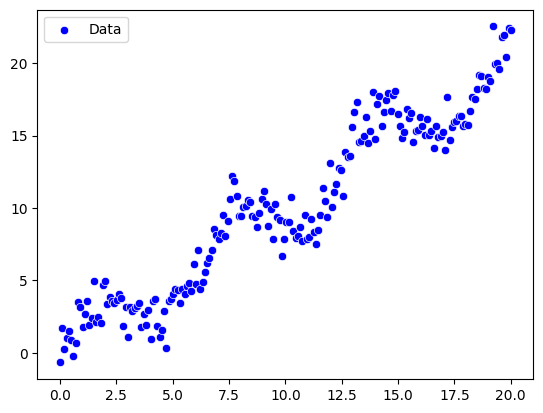

In [23]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [24]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [25]:
df = Simple1DRegressionDataset(X,y)


In [26]:
df[0]


(tensor([0.]), tensor([-0.6731]))

In [27]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [28]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[9.6239]])]

In [29]:
# construct the model using Linear block
in_features = 1
out_features = 1
model_2 = nn.Linear(in_features,out_features)


In [30]:
l1 = nn.Linear(in_features,4)
l2 = nn.Linear(4,8)
l3 = nn.Linear(8,16)
l4 = nn.Linear(16,32)
l5 = nn.Linear(32,64)
l6 = nn.Linear(64, out_features)
model_2 = nn.Sequential(l1,nn.ReLU(),l2,nn.ReLU(),l3,nn.ReLU(),l4,nn.ReLU(),l5,nn.ReLU(),l6)

In [31]:
loss_fn = nn.MSELoss()

In [32]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.001)

In [33]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            # print(running_loss)



In [34]:
device = 'cpu'
device

'cpu'

In [35]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=500
                )


Epochs:   0%|          | 0/500 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

In [36]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

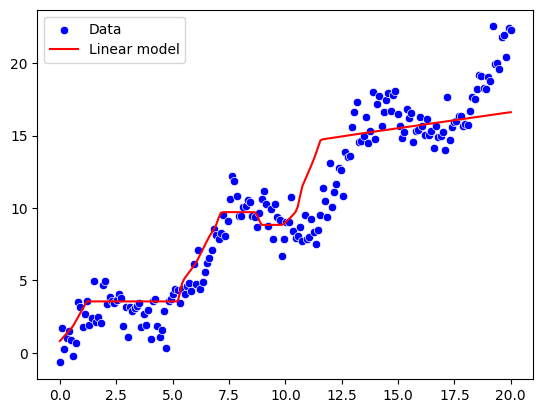

In [37]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
